In [1]:
from pathlib import Path
import sys

sys.path.append(str(Path('').absolute().parent))


from stable_baselines3 import DQN, A2C
from stable_baselines3.a2c import MlpPolicy
from stable_baselines3.common.env_util import make_vec_env

from gym_snake.envs.SnakeEnv import SnakeEnv

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import random
random.seed(42)

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [6]:
def plot_metrics(metrics, filepath=None):
    formatted_dict = {'episodes': [],
                      'metrics': [],
                      'results': []}

    n = len(metrics['score'])
    for i in range(n):        
        score = metrics['score'][i]
        reward = metrics['reward'][i]

        formatted_dict['episodes'].append(i)
        formatted_dict['metrics'].append('score')
        formatted_dict['results'].append(score)

        formatted_dict['episodes'].append(i)
        formatted_dict['metrics'].append('reward')
        formatted_dict['results'].append(reward)

    df_metrics = pd.DataFrame(formatted_dict)
    sns.lineplot(data=df_metrics, x='episodes', y='results', hue='metrics')
    if filepath is None:
        plt.show()
    else:
        plt.savefig(filepath)
        
def evaluate(model):
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)
    obs = env.reset()

    for _ in range(10000):
        action, _states = model.predict(obs)
        obs, rewards, dones, info = env.step(action)
        env.render()

    return snake_env.record, np.mean(snake_env.results)

Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 166      |
|    ep_rew_mean        | -40      |
| time/                 |          |
|    fps                | 239      |
|    iterations         | 1000     |
|    time_elapsed       | 20       |
|    total_timesteps    | 5000     |
| train/                |          |
|    entropy_loss       | -0.548   |
|    explained_variance | -0.00827 |
|    learning_rate      | 0.001    |
|    n_updates          | 999      |
|    policy_loss        | -0.00102 |
|    value_loss         | 0.00144  |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 114      |
|    ep_rew_mean        | -15.1    |
| time/                 |          |
|    fps                | 245      |
|    iterations         | 2000     |
|    time_elapsed       | 40       |
|    total_timesteps    | 10000    |
| train/             

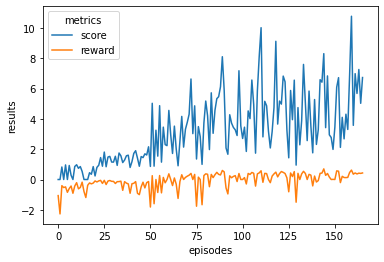

Max Score: 19


In [3]:
results = {}
for _ in range(10):
    # enable_render=True turns on the display
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)

    gamma = random.uniform(0.85, 1)
    
    model = A2C(MlpPolicy, env, verbose=1, learning_rate=1e-3, seed=42, gamma=gamma)
    model.learn(total_timesteps=20000, log_interval=1000)

    # Print rewards and scores for each episode
    max_train_score = snake_env.record
    m_train_score = np.mean(snake_env.results)
    max_test_score, mean_test_score = evaluate(model)
    
    results[gamma] = (snake_env.results, max_train_score, max_test_score, mean_test_score)

In [9]:
for gamma, results in results.items():
    metrics, max_train_score, max_test_score = results
    np.mean(snake_env.results)
    
    
    print("Gamma", gamma)
    plot_metrics(metrics)    
    print("Max Train Score", max_train_score, "Max Test Score", max_test_score)
    
    print("-"*100)

Test - Max Score: 23
